In [1]:
! pip3 install rdkit

import numpy as np
import rdkit
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.1/33.1 MB 13.1 MB/s eta 0:00:00


In [3]:
df = pd.read_csv('chembl1.csv',sep=';',on_bad_lines='skip')
# By using on_bad_lines='skip', you instruct pandas to skip any problematic
# lines instead of raising an error.

In [ ]:
df.head()

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Target Type,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties,Action Type,Standard Text Value
0,CHEMBL253309,NaN,NaN,563.79,1.0,3.30,"3, cyclo(-L-Am7(S2Py)-Aib-L-Leu-D-Pro-)",CC(C)C[C@@H]1NC(=O)C(C)(C)NC(=O)[C@H](CCCCCSSc...,IC50,'=',...,SINGLE PROTEIN,CHEMBL1140755,1,Scientific Literature,Bioorg Med Chem,2008,NaN,NaN,NaN,NaN
1,CHEMBL269935,NaN,NaN,289.33,0.0,4.31,2,O=C(Nc1cc(-c2ccccc2)ccc1O)c1ccccc1,IC50,'>',...,SINGLE PROTEIN,CHEMBL1143185,1,Scientific Literature,Bioorg Med Chem Lett,2008,NaN,NaN,NaN,NaN
2,CHEMBL437029,NaN,NaN,521.62,2.0,5.43,56,C[C@H]1CN(c2ccc(C(=O)Nc3cc(-c4ccccc4)ccc3N)cn2...,IC50,'>',...,SINGLE PROTEIN,CHEMBL1143185,1,Scientific Literature,Bioorg Med Chem Lett,2008,NaN,NaN,NaN,NaN
3,CHEMBL3639926,NaN,NaN,411.55,0.0,4.88,BDBM110013,Cc1cc(C)c(Nc2ccc(C(=O)N(C)CCCCCCC(=O)NO)cc2)c(...,IC50,'=',...,SINGLE PROTEIN,CHEMBL3639257,37,BindingDB Database,NaN,2013,NaN,NaN,NaN,NaN
4,CHEMBL3693779,NaN,NaN,496.55,1.0,5.09,BDBM110029,COC(c1ccc(F)cc1)(c1ccc(F)cc1)c1ccc(C(=O)NCCCCC...,IC50,'=',...,SINGLE PROTEIN,CHEMBL3639257,37,BindingDB Database,NaN,2013,NaN,NaN,NaN,NaN


In [4]:
df.shape

(6488, 47)

In [5]:
df.columns

Index(['Molecule ChEMBL ID', 'Molecule Name', 'Molecule Max Phase',
       'Molecular Weight', '#RO5 Violations', 'AlogP', 'Compound Key',
       'Smiles', 'Standard Type', 'Standard Relation', 'Standard Value',
       'Standard Units', 'pChEMBL Value', 'Data Validity Comment', 'Comment',
       'Uo Units', 'Ligand Efficiency BEI', 'Ligand Efficiency LE',
       'Ligand Efficiency LLE', 'Ligand Efficiency SEI', 'Potential Duplicate',
       'Assay ChEMBL ID', 'Assay Description', 'Assay Type', 'BAO Format ID',
       'BAO Label', 'Assay Organism', 'Assay Tissue ChEMBL ID',
       'Assay Tissue Name', 'Assay Cell Type', 'Assay Subcellular Fraction',
       'Assay Parameters', 'Assay Variant Accession', 'Assay Variant Mutation',
       'Target ChEMBL ID', 'Target Name', 'Target Organism', 'Target Type',
       'Document ChEMBL ID', 'Source ID', 'Source Description',
       'Document Journal', 'Document Year', 'Cell ChEMBL ID', 'Properties',
       'Action Type', 'Standard Text Value'],
 

In [6]:
selected_columns=['Smiles','Standard Value','Standard Type']
filter_df = pd.DataFrame(df,columns=selected_columns)
filter_df.head()

,Smiles,Standard Value,Standard Type
0,CC(C)C[C@@H]1NC(=O)C(C)(C)NC(=O)[C@H](CCCCCSSc...,230.0,IC50
1,O=C(Nc1cc(-c2ccccc2)ccc1O)c1ccccc1,50000.0,IC50
2,C[C@H]1CN(c2ccc(C(=O)Nc3cc(-c4ccccc4)ccc3N)cn2...,50000.0,IC50
3,Cc1cc(C)c(Nc2ccc(C(=O)N(C)CCCCCCC(=O)NO)cc2)c(...,35.0,IC50
4,COC(c1ccc(F)cc1)(c1ccc(F)cc1)c1ccc(C(=O)NCCCCC...,13.0,IC50


In [7]:
filter_df['Standard Value'] = filter_df['Standard Value'] / 1e9


In [8]:
cleaned_df = df.dropna()

In [9]:
cleaned_df.shape

(0, 47)

In [10]:
def norm_value(input):
  norm = []
  for i in input['Standard Value']:
    if i > 100000000:
      i = 100000000
    norm.append(i)
  input['Standard_Value_norm'] = norm
  x = input.drop(columns=['Standard Value'])
  return(x)
standard_df = norm_value(filter_df)
standard_df

,Smiles,Standard Type,Standard_Value_norm
0,CC(C)C[C@@H]1NC(=O)C(C)(C)NC(=O)[C@H](CCCCCSSc...,IC50,2.300000e-07
1,O=C(Nc1cc(-c2ccccc2)ccc1O)c1ccccc1,IC50,5.000000e-05
2,C[C@H]1CN(c2ccc(C(=O)Nc3cc(-c4ccccc4)ccc3N)cn2...,IC50,5.000000e-05
3,Cc1cc(C)c(Nc2ccc(C(=O)N(C)CCCCCCC(=O)NO)cc2)c(...,IC50,3.500000e-08
4,COC(c1ccc(F)cc1)(c1ccc(F)cc1)c1ccc(C(=O)NCCCCC...,IC50,1.300000e-08
...,...,...,...
6483,O=C(CCCCCCC(=O)Nc1ccccc1)NO,IC50,3.300000e-08
6484,O=C(CCCCCCNC(=O)c1cnc(N(c2ccccc2)c2ccccc2)nc1)NO,IC50,4.700000e-09
6485,CNc1nc(Cl)nc2c1ncn2Cc1ccc(C(=O)Nc2ccccc2N)cc1,IC50,2.180000e-05
6486,Cc1cc(C)c(CNC(=O)c2cc(-c3ccc(NC(=O)CCCCCCC(=O)...,IC50,1.800000e-07


In [11]:

# Convert IC50 to pIC50
standard_df['pIC50'] = -np.log10(standard_df['Standard_Value_norm'])

# Display the updated DataFrame
print(standard_df)


                                                 Smiles Standard Type  \
0     CC(C)C[C@@H]1NC(=O)C(C)(C)NC(=O)[C@H](CCCCCSSc...          IC50   
1                    O=C(Nc1cc(-c2ccccc2)ccc1O)c1ccccc1          IC50   
2     C[C@H]1CN(c2ccc(C(=O)Nc3cc(-c4ccccc4)ccc3N)cn2...          IC50   
3     Cc1cc(C)c(Nc2ccc(C(=O)N(C)CCCCCCC(=O)NO)cc2)c(...          IC50   
4     COC(c1ccc(F)cc1)(c1ccc(F)cc1)c1ccc(C(=O)NCCCCC...          IC50   
...                                                 ...           ...   
6483                        O=C(CCCCCCC(=O)Nc1ccccc1)NO          IC50   
6484   O=C(CCCCCCNC(=O)c1cnc(N(c2ccccc2)c2ccccc2)nc1)NO          IC50   
6485      CNc1nc(Cl)nc2c1ncn2Cc1ccc(C(=O)Nc2ccccc2N)cc1          IC50   
6486  Cc1cc(C)c(CNC(=O)c2cc(-c3ccc(NC(=O)CCCCCCC(=O)...          IC50   
6487  COc1cc(C(=O)c2csc(-c3ccc(C#CCCC(=O)Nc4ccccc4N)...          IC50   

      Standard_Value_norm     pIC50  
0            2.300000e-07  6.638272  
1            5.000000e-05  4.301030  
2        

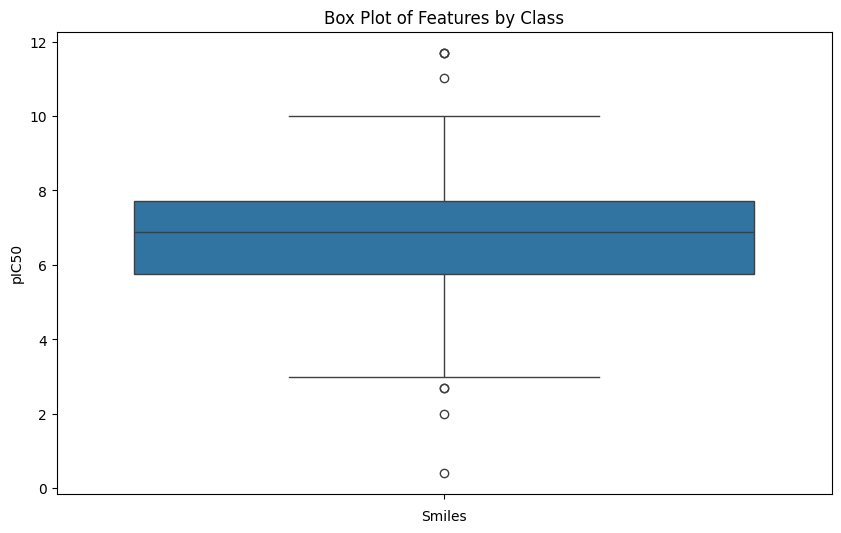

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(y='pIC50', data=standard_df)
plt.title('Box Plot of Features by Class')
plt.xlabel('Smiles')
plt.ylabel('pIC50')
plt.show()

In [13]:
standard_df['pIC50'].max()

11.698970004336019

In [14]:
standard_df['pIC50'].min()

0.4205594028602028

In [15]:
pIC50_threshold=[]

for i in standard_df.pIC50:
  if float(i) >7:
      pIC50_threshold.append("Rank I")
  elif float(i) > 5:
      pIC50_threshold.append("Rank II")
  else:
      pIC50_threshold.append("Rank III")

In [16]:
count_r1=0
for ele in pIC50_threshold:
  if ele=="Rank III":count_r1+=1

print(count_r1)

1142


In [17]:
pIC50_class = pd.Series(pIC50_threshold, name='pIC50_class')
final_df = pd.concat([standard_df, pIC50_class], axis=1)
final_df.head()

,Smiles,Standard Type,Standard_Value_norm,pIC50,pIC50_class
0,CC(C)C[C@@H]1NC(=O)C(C)(C)NC(=O)[C@H](CCCCCSSc...,IC50,2.300000e-07,6.638272,Rank II
1,O=C(Nc1cc(-c2ccccc2)ccc1O)c1ccccc1,IC50,5.000000e-05,4.301030,Rank III
2,C[C@H]1CN(c2ccc(C(=O)Nc3cc(-c4ccccc4)ccc3N)cn2...,IC50,5.000000e-05,4.301030,Rank III
3,Cc1cc(C)c(Nc2ccc(C(=O)N(C)CCCCCCC(=O)NO)cc2)c(...,IC50,3.500000e-08,7.455932,Rank I
4,COC(c1ccc(F)cc1)(c1ccc(F)cc1)c1ccc(C(=O)NCCCCC...,IC50,1.300000e-08,7.886057,Rank I


In [18]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem, PandasTools
from rdkit.ML.Descriptors import MoleculeDescriptors

In [19]:
descriptor_names = [desc_name[0] for desc_name in Descriptors._descList]

calculator = MoleculeDescriptors.MolecularDescriptorCalculator(descriptor_names)

def calculate_descriptors(Smiles):
    try:
        mol = Chem.MolFromSmiles(Smiles)
        if mol is not None:
            return calculator.CalcDescriptors(mol)
        else:
            return [None] * len(descriptor_names)
    except:
        return [None] * len(descriptor_names)

descriptors = standard_df['Smiles'].apply(calculate_descriptors)
desc = pd.DataFrame(descriptors.tolist(), columns=descriptor_names)
results_df = pd.concat([final_df, desc], axis=1)


Streaming output truncated to the last 5000 lines.
[04:46:29] DEPRECATION WARNING: please use MorganGenerator
[04:46:29] DEPRECATION WARNING: please use MorganGenerator
[04:46:29] DEPRECATION WARNING: please use MorganGenerator
[04:46:29] DEPRECATION WARNING: please use MorganGenerator
[04:46:29] DEPRECATION WARNING: please use MorganGenerator
[04:46:29] DEPRECATION WARNING: please use MorganGenerator
[04:46:29] DEPRECATION WARNING: please use MorganGenerator
[04:46:29] DEPRECATION WARNING: please use MorganGenerator
[04:46:29] DEPRECATION WARNING: please use MorganGenerator
[04:46:29] DEPRECATION WARNING: please use MorganGenerator
[04:46:29] DEPRECATION WARNING: please use MorganGenerator
[04:46:29] DEPRECATION WARNING: please use MorganGenerator
[04:46:29] DEPRECATION WARNING: please use MorganGenerator
[04:46:29] DEPRECATION WARNING: please use MorganGenerator
[04:46:29] DEPRECATION WARNING: please use MorganGenerator
[04:46:29] DEPRECATION WARNING: please use MorganGenerator
[04:4

In [21]:
cleaned_final = results_df.dropna()
print(f"Original DataFrame shape: {results_df.shape}")
print(f"Cleaned DataFrame shape: {cleaned_final.shape}")

Original DataFrame shape: (6488, 215)
Cleaned DataFrame shape: (6272, 215)


In [22]:
c=0
check=cleaned_final['pIC50_class']
for ele in check:
  if ele=='Rank III': c+=1

print(c)

952


In [23]:
cleaned_final.head()

,Smiles,Standard Type,Standard_Value_norm,pIC50,pIC50_class,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,CC(C)C[C@@H]1NC(=O)C(C)(C)NC(=O)[C@H](CCCCCSSc...,IC50,2.300000e-07,6.638272,Rank II,13.450481,13.450481,0.167702,-1.237584,0.295108,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
1,O=C(Nc1cc(-c2ccccc2)ccc1O)c1ccccc1,IC50,5.000000e-05,4.301030,Rank III,12.191887,12.191887,0.045335,-0.248971,0.705740,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,C[C@H]1CN(c2ccc(C(=O)Nc3cc(-c4ccccc4)ccc3N)cn2...,IC50,5.000000e-05,4.301030,Rank III,12.957424,12.957424,0.049385,-0.317974,0.328284,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Cc1cc(C)c(Nc2ccc(C(=O)N(C)CCCCCCC(=O)NO)cc2)c(...,IC50,3.500000e-08,7.455932,Rank I,12.632866,12.632866,0.003616,-0.353767,0.295518,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
4,COC(c1ccc(F)cc1)(c1ccc(F)cc1)c1ccc(C(=O)NCCCCC...,IC50,1.300000e-08,7.886057,Rank I,13.653820,13.653820,0.215010,-1.135580,0.141117,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0


In [24]:
cleaned_final.shape

(6272, 215)

In [25]:
from sklearn.preprocessing import RobustScaler
df_robust = cleaned_final.copy()

numeric_columns = df_robust.select_dtypes(include=['float64', 'int64']).columns
numeric_columns = [col for col in numeric_columns if col != 'pIC50']

scaler = RobustScaler()


df_robust[numeric_columns] = scaler.fit_transform(df_robust[numeric_columns])

df_robust.head()

,Smiles,Standard Type,Standard_Value_norm,pIC50,pIC50_class,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,CC(C)C[C@@H]1NC(=O)C(C)(C)NC(=O)[C@H](CCCCCSSc...,IC50,0.055734,6.638272,Rank II,0.653725,0.653725,0.290430,-1.745846,-0.234714,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,O=C(Nc1cc(-c2ccccc2)ccc1O)c1ccccc1,IC50,27.794343,4.301030,Rank III,-0.154252,-0.154252,-0.417777,0.778691,1.143936,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,C[C@H]1CN(c2ccc(C(=O)Nc3cc(-c4ccccc4)ccc3N)cn2...,IC50,27.794343,4.301030,Rank III,0.337199,0.337199,-0.394342,0.602483,-0.123327,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Cc1cc(C)c(Nc2ccc(C(=O)N(C)CCCCCCC(=O)NO)cc2)c(...,IC50,-0.052947,7.455932,Rank I,0.128842,0.128842,-0.659231,0.511082,-0.233335,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.5,0.0
4,COC(c1ccc(F)cc1)(c1ccc(F)cc1)c1ccc(C(=O)NCCCCC...,IC50,-0.065208,7.886057,Rank I,0.784263,0.784263,0.564227,-1.485368,-0.751720,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.5,0.0


In [26]:
df_robust.shape

(6272, 215)

In [27]:
#there are some invalid entries(values tending to infinity) that were giving errors in the subsequent steps, this code is to remove those invalid entries

invalid_count = 0

float32_threshold = np.finfo(np.float32).max

rows_to_drop = []

for index, row in df_robust.iterrows():
    for value in row:

        if pd.api.types.is_numeric_dtype(type(value)):
            if pd.isnull(value) or np.isinf(value) or abs(value) > float32_threshold:
                rows_to_drop.append(index)
                invalid_count += 1
                break
        else:

            if pd.isnull(value):
                rows_to_drop.append(index)
                invalid_count += 1
                break

df_robust.drop(rows_to_drop, inplace=True)


print(f"Dropped {invalid_count} invalid entries.")

Dropped 0 invalid entries.


In [28]:
df_robust.shape

(6272, 215)

In [32]:
y = df_robust['pIC50_class']
X = df_robust.drop(columns=['Smiles', 'pIC50','pIC50_class','Standard Type', 'Standard_Value_norm'])

In [33]:
print(y.head())
print(X.head())

0     Rank II
1    Rank III
2    Rank III
3      Rank I
4      Rank I
Name: pIC50_class, dtype: object
   MaxAbsEStateIndex  MaxEStateIndex  MinAbsEStateIndex  MinEStateIndex  \
0           0.653725        0.653725           0.290430       -1.745846   
1          -0.154252       -0.154252          -0.417777        0.778691   
2           0.337199        0.337199          -0.394342        0.602483   
3           0.128842        0.128842          -0.659231        0.511082   
4           0.784263        0.784263           0.564227       -1.485368   

        qed       SPS     MolWt  HeavyAtomMolWt  ExactMolWt  \
0 -0.234714  2.927289  1.144499        1.092375    1.143715   
1  1.143936 -0.320234 -0.744458       -0.738116   -0.744582   
2 -0.123327  0.804894  0.854269        0.855762    0.854307   
3 -0.233335 -0.231312  0.096672        0.029244    0.096711   
4 -0.751720 -0.079840  0.681744        0.678360    0.681936   

   NumValenceElectrons  ...  fr_sulfide  fr_sulfonamd  fr_sulfone  

In [80]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)

rf.fit(X, y)

importances = rf.feature_importances_

importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

selected_features = importance_df.head(5)['Feature'].tolist()

print("Top n features:", selected_features)

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [81]:
X_selected = pd.DataFrame(X, columns=selected_features)

X_selected.head()

ValueError: Shape of passed values is (150, 4), indices imply (150, 15)

In [50]:
data=X_selected.copy()
data['bioactivity_class']=y

train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
target = 'bioactivity_class'

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
X_train = train_data.drop(columns=[target])
y_train = train_data[target]
X_test = test_data.drop(columns=[target])
y_test = test_data[target]

rf_classifier = RandomForestClassifier(n_estimators=25, random_state=42)
rf_classifier.fit(X_train, y_train)


y_pred = rf_classifier.predict(X_test)

y_train_pred=rf_classifier.predict(X_train)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.76
Classification Report:
              precision    recall  f1-score   support

      Rank I       0.77      0.85      0.81       587
     Rank II       0.72      0.67      0.69       492
    Rank III       0.83      0.73      0.77       176

    accuracy                           0.76      1255
   macro avg       0.77      0.75      0.76      1255
weighted avg       0.76      0.76      0.76      1255

Confusion Matrix:
[[497  86   4]
 [140 329  23]
 [  5  43 128]]


In [52]:
print("Classification Report:")
print(classification_report(y_train, y_train_pred))

Classification Report:
              precision    recall  f1-score   support

      Rank I       0.96      0.98      0.97      2347
     Rank II       0.96      0.94      0.95      1894
    Rank III       0.98      0.97      0.98       776

    accuracy                           0.96      5017
   macro avg       0.97      0.96      0.96      5017
weighted avg       0.96      0.96      0.96      5017



In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_train = train_data.drop(columns=[target])
y_train = train_data[target]
X_test = test_data.drop(columns=[target])
y_test = test_data[target]

rf_classifier = RandomForestClassifier(
    n_estimators=250,
    max_depth=50,
    min_samples_split=7,
    min_samples_leaf=5,
    random_state=60,
    max_features='sqrt'
)

rf_classifier.fit(X_train, y_train)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

y_train_pred = rf_classifier.predict(X_train)
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))


Accuracy: 0.76
Classification Report:
              precision    recall  f1-score   support

      Rank I       0.77      0.85      0.81       587
     Rank II       0.72      0.67      0.69       492
    Rank III       0.83      0.73      0.77       176

    accuracy                           0.76      1255
   macro avg       0.77      0.75      0.76      1255
weighted avg       0.76      0.76      0.76      1255

Confusion Matrix:
[[497  86   4]
 [140 329  23]
 [  5  43 128]]
Training Accuracy: 0.8875822204504684


In [54]:
print("Classification Report:")
print(classification_report(y_train, y_train_pred))

Classification Report:
              precision    recall  f1-score   support

      Rank I       0.81      0.95      0.87      2347
     Rank II       0.85      0.73      0.78      1894
    Rank III       0.92      0.77      0.84       776

    accuracy                           0.84      5017
   macro avg       0.86      0.82      0.83      5017
weighted avg       0.84      0.84      0.83      5017



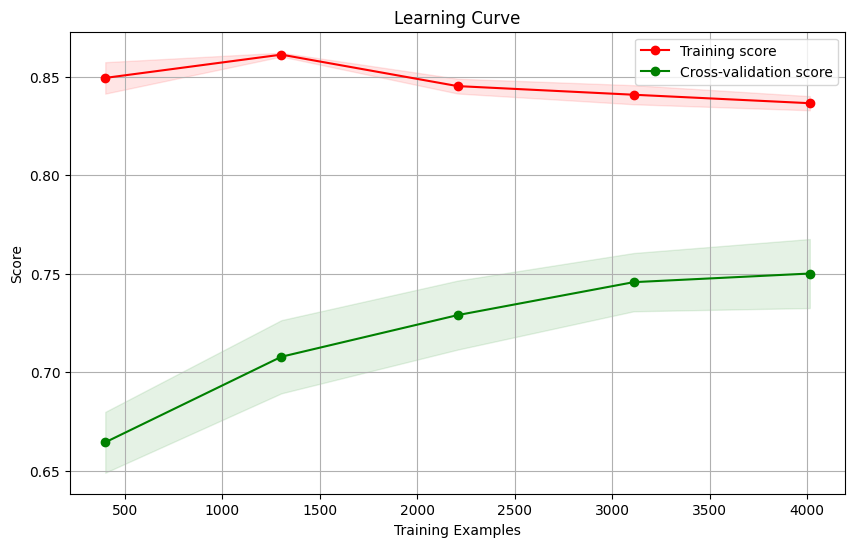

In [59]:

import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y, title="Learning Curve", cv=5, n_jobs=None, train_sizes=np.linspace(0.1, 1.0, 5)):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Training Examples")
    plt.ylabel("Score")

    # Calculate learning curve
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy'
    )

    # Mean and standard deviation for training and validation scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot the learning curve
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()

# Example usage (assuming rf_classifier, X_train, y_train are defined)
plot_learning_curve(rf_classifier, X_train, y_train)


In [71]:
! pip install tpot
import tpot


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 6.5 MB/s eta 0:00:00
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11938 sha256=b821110f23b4ff38edd892f5ee546c41c6d1286589cb19af43825b057d8dd5b7
  Stored in directory: /root/.cache/pip/wheels/af/f9/87/bf5b3d565c2a007b4dae9d8142dccc85a9f164e517062dd519
Successfully built stopit


In [72]:
import tpot
print(tpot.__version__)


0.12.2


In [76]:
import pandas as pd
from rdkit import Chem
from rdkit.ML.Descriptors import MoleculeDescriptors
from tpot import TPOTClassifier
from sklearn.model_selection import train_test_split

# Example SMILES data (replace with your own)
Smiles_list = ['CCO', 'CC(=O)O', 'C1=CC=CC=C1', 'C1CCCCC1']
labels = [0, 1, 1, 0]  # Example labels

# Create a DataFrame
data = pd.DataFrame({'Smiles': Smiles_list, 'Label': labels})

# Function to convert SMILES to descriptors
def smiles_to_descriptors(Smiles):
    mol = Chem.MolFromSmiles(Smiles)
    if mol is not None:
        return [desc for desc in MoleculeDescriptors._descList]
    else:
        return [0] * len(MoleculeDescriptors._descList)

# Convert SMILES to descriptors
descriptors = [calcuate_descriptors(Smiles) for smiles in data['Smiles']]
X = pd.DataFrame(descriptors)
y = data['Label']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the TPOTClassifier
tpot = TPOTClassifier(verbosity=2, generations=5, population_size=20, random_state=42)

# Fit the model
tpot.fit(X_train, y_train)

# Evaluate the model
print(f"Test Accuracy: {tpot.score(X_test, y_test)}")

# Export the best pipeline
tpot.export('best_pipeline.py')


NameError: name 'calcuate_descriptors' is not defined